In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics
from sqlalchemy import create_engine

In [44]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host,
                                                            postgres_port, postgres_db))

df = pd.read_sql_query('select * from {}'.format(postgres_db), con=engine)

In [45]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [46]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [47]:
X_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_std)

# 1. Apply DBSCAN to the heart disease data by trying different values for eps and min_samples parameters. You'll realize that it's really hard to get a two cluster solution using DBSCAN if not impossible.

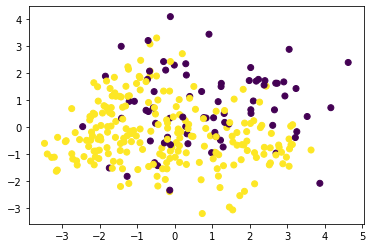

In [48]:
dbscan = DBSCAN(eps=3, min_samples=10, metric='euclidean')
y_preds = dbscan.fit_predict(X_std)

plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=y_preds)
plt.show()

# 2. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of min_samples. What's the effect of increasing min_samples on the number of clusters DBSCAN identifies?

### (min_samples = 1) and (eps = 1)

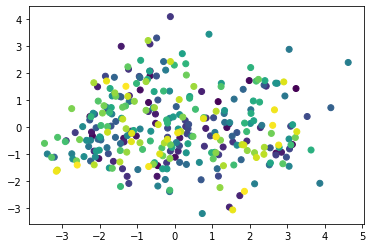

In [49]:
dbscan = DBSCAN(eps=1, min_samples=1, metric='euclidean')
y_preds = dbscan.fit_predict(X_std)

plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=y_preds)
plt.show()

### (min_samples = 5) and (eps = 1)

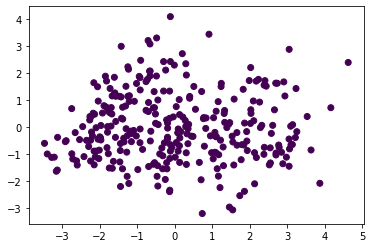

In [50]:
dbscan = DBSCAN(eps=1, min_samples=5, metric='euclidean')
y_preds = dbscan.fit_predict(X_std)

plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=y_preds)
plt.show()

Increasing the min_samples parameter decreased the amount of clusters

# 3. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of eps. What's the effect of increasing eps on the number of clusters DBSCAN identifies?

### (min_samples = 1) and (eps = 1)

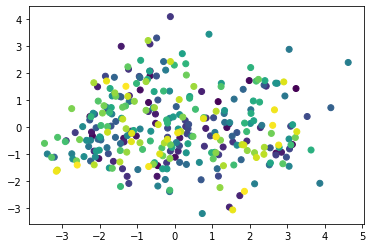

In [52]:
dbscan = DBSCAN(eps=1, min_samples=1, metric='euclidean')
y_preds = dbscan.fit_predict(X_std)

plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=y_preds)
plt.show()

### (min_samples = 1) and (eps = .01)

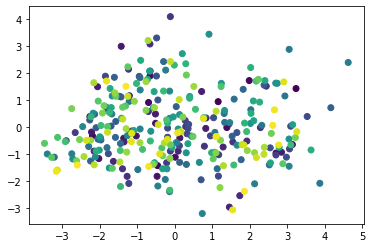

In [53]:
dbscan = DBSCAN(eps=.01, min_samples=1, metric='euclidean')
y_preds = dbscan.fit_predict(X_std)

plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=y_preds)
plt.show()

### (min_samples = 1) and (eps = 5)

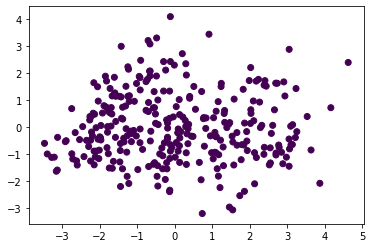

In [55]:
dbscan = DBSCAN(eps=5, min_samples=1, metric='euclidean')
y_preds = dbscan.fit_predict(X_std)

plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=y_preds)
plt.show()

Increasing eps also seems to decrease the number of clusters.

# ASk mukesh - Is DBSCAN useless if there is no linear separation between clusters?